# Loading the data and general understanding

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))
housing = load_housing_data()

In [2]:
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [3]:
housing.shape

(20640, 10)

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
housing['ocean_proximity'] = housing['ocean_proximity'].apply(str.lower)

In [8]:
housing['ocean_proximity'] = housing['ocean_proximity'].str.replace(' ', '_')

In [9]:
housing['ocean_proximity']

0        near_bay
1        near_bay
2        near_bay
3        near_bay
4        near_bay
           ...   
20635      inland
20636      inland
20637      inland
20638      inland
20639      inland
Name: ocean_proximity, Length: 20640, dtype: object

In [10]:
IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

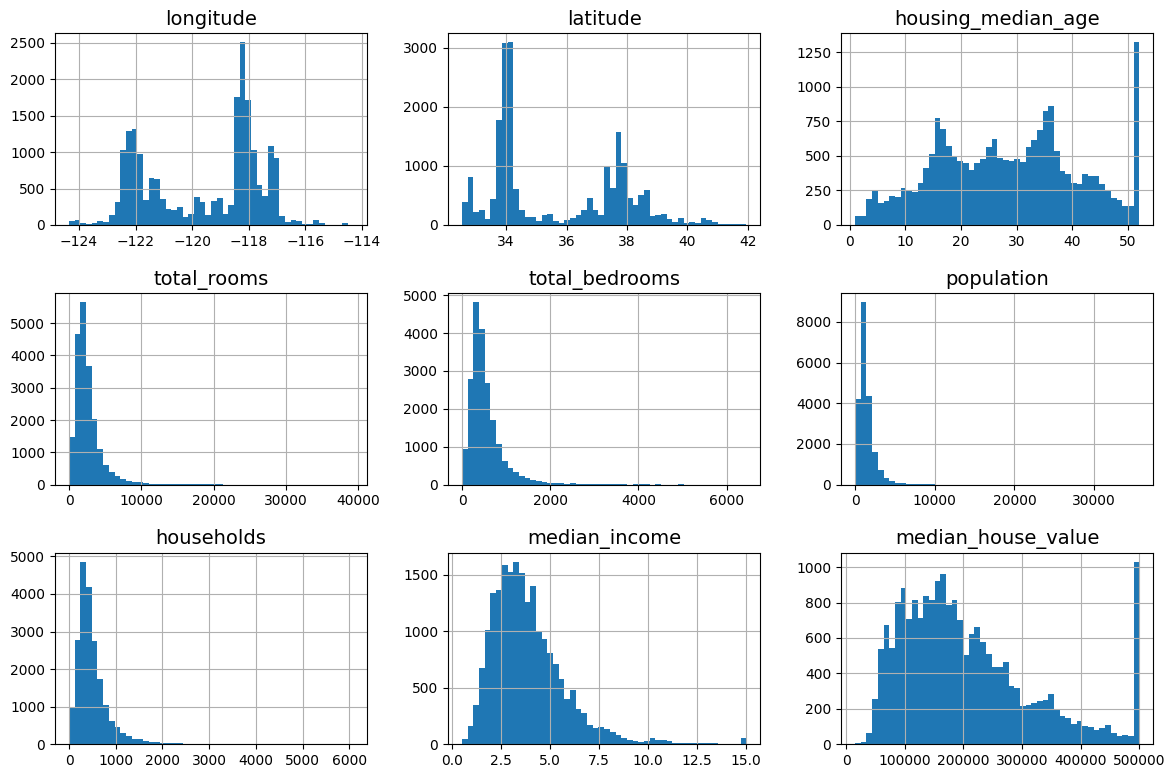

In [11]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")
plt.show()

median_income, housing_median_age, median_housing_value are capped
the latter may be a problem because it's our target values. our algo may learn that values doesn't go beyond 500000. So, get accurate data if the client wants or remove capped values from training and test sets

many histograms are skewed right: they extend much farther to
the right of the median than to the left. This may make it a bit harder
for some machine learning algorithms to detect patterns.

Wait! Before you look at the data any further, you need to create a test set, put it aside, and never look at it.

# Creating a Test Set

In [12]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [13]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)
print(f"Train set size: {len(train_set)}")
print(f"Test set size: {len(test_set)}")

Train set size: 16512
Test set size: 4128


In [14]:
#np.random.seed(42)

the next time we run the notebook it will give a new shuffle
Solutions:
1. save the test set and load it in subsequent runs
2. Another option is to set the random number generator’s seed so that it always generates the same shuffled indices.
**both these solution break when fetching an updated dataset**\
3. use each instance’s identifier to decide whether or not it should go in the test set (assuming instances have unique and immutable identifiers). For example, you could compute a hash of each instance’s identifier and put that instance in the test set if the hash is lower than or equal to 20% of the maximum hash value.

In [15]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [16]:
housing_with_id = housing.reset_index()
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

In [17]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near_bay
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,near_bay
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,near_bay
16,16,-122.27,37.85,52.0,1966.0,347.0,793.0,331.0,2.7750,152500.0,near_bay
23,23,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,near_bay


In [18]:
print(f"Train set size: {len(train_set)}")
print(f"Test set size: {len(test_set)}")

Train set size: 16512
Test set size: 4128


If you use the row index as a unique identifier, you need to make sure that new data gets appended to the end of the dataset and that no row ever gets deleted\
If this is not possible, then you can try to use the most stable
features to build a unique identifier.\
For example, a district’s latitude and
longitude are guaranteed to be stable for a few million years, so you could
combine them into an ID like so:

In [19]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")

In [20]:
print(f"Train set size: {len(train_set)}")
print(f"Test set size: {len(test_set)}")

Train set size: 16322
Test set size: 4318


In [21]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
59,59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,near_bay,-122252.18
60,60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,3.3929,75700.0,near_bay,-122252.17
61,61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,near_bay,-122252.18
62,62,-122.29,37.81,50.0,760.0,190.0,377.0,122.0,0.9011,86100.0,near_bay,-122252.19
67,67,-122.29,37.80,52.0,1027.0,244.0,492.0,147.0,2.6094,81300.0,near_bay,-122252.20


sklearn has train_test_split() similar to shuffle_and_split_data(). extra features:\
1. there is a "random_state" parameter to set the random generator seed.
2. we can pass multiple datasets with the same num of rows, and it will split them on the same indices. "in case we have a seperate Dataframe for labels"

In [22]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [23]:
print(f"Train set size: {len(train_set)}")
print(f"Test set size: {len(test_set)}")

Train set size: 16512
Test set size: 4128


### Stratified Sampling 
Suppose you’ve chatted with some experts who told you that the median income is a very important attribute to predict median housing prices. You may want to ensure that the test set is representative of the various
categories of incomes in the whole dataset. Since the median income is a continuous numerical attribute, you first need to create an income category attribute.

To understand the upcoming part refer to **binomial distribution**

To find the probability that a random sample of 1,000 people contains less than 48.5% female or more than 53.5% female when the population's female ratio is 51.1%, we use the binomial distribution. The cdf() method of the binomial distribution gives us the probability that the number of females will be equal or less than the given value.

In [24]:
from scipy.stats import binom

sample_size = 1000
ratio_female = 0.511
proba_too_small = binom(sample_size, ratio_female).cdf(485 - 1)
proba_too_large = 1 - binom(sample_size, ratio_female).cdf(535)
print(proba_too_small + proba_too_large)

0.10736798530929942


back to what we said about median income
Let’s look at the median income histogram more closely most median income values are clustered around 1.5 to 6 (i.e.,
$15,000–$60,000), but some median incomes go far beyond 6. It is important to have a sufficient number of instances in your dataset for each stratum, or else the estimate of a stratum’s importance may be biased. This means that you should not have too many strata, and each stratum should be large enough.

In [25]:
housing["income_cat"] = pd.cut(housing["median_income"],
                              bins=[0., 1.5, 3.0, 4.5, 6.,
                                   np.inf],
                              labels=[1, 2, 3, 4, 5])

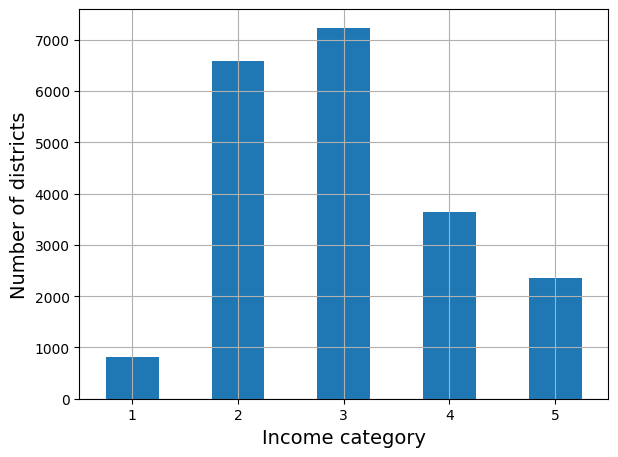

In [26]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
save_fig("housing_income_cat_bar_plot")
plt.show()

In [27]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2,
                                  random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing,
                                              housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [28]:
strat_train_set, strat_test_set = strat_splits[0]

or we can use a shorter way because our stratiffied saampling is fairly common

In [29]:
strat_train_set, strat_test_set = train_test_split(housing, 
                                        test_size=0.2,
                                        stratify=housing['income_cat'],
                                        random_state=42)


In [30]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [31]:
# extra code – computes the data for Figure 2–10

def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(housing),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


we won't use the "income_cat" column again so we could drop it to revert the data to its orifinal staate

In [32]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Data Exploration

1. we want to make sure to only explore the training data
2. if the training data is too large, take a sample

In [33]:
housing = strat_train_set.copy()

## Visualizing geographical data

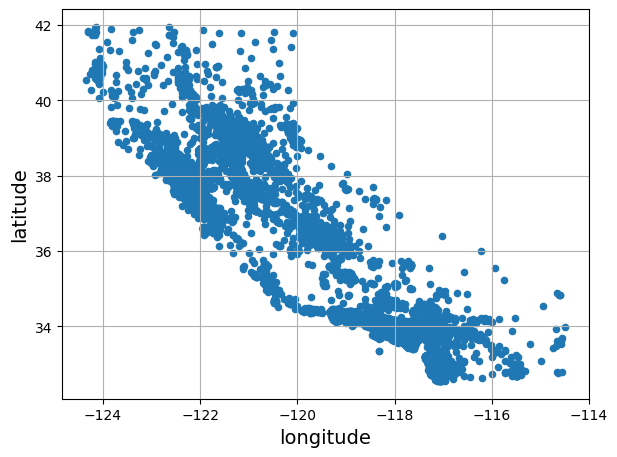

In [34]:
housing.plot(kind='scatter', x='longitude', y='latitude', grid=True)
save_fig("bad_visualization_plot")
plt.show()

Setting the alpha option to 0.2 makes it much easier to
visualize the places where there is a high density of data points

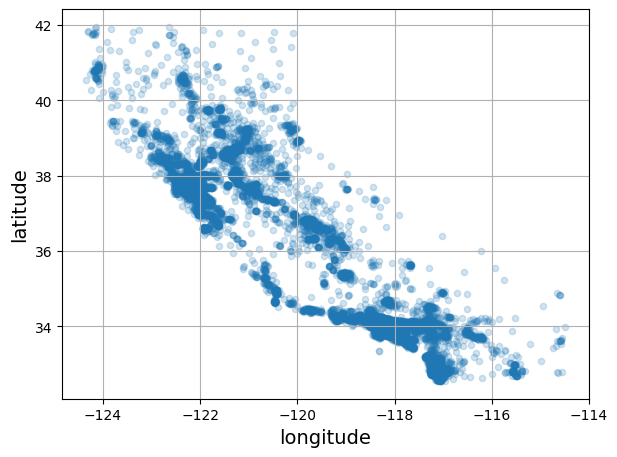

In [35]:
housing.plot(kind='scatter', x='longitude', y='latitude',
             grid=True, alpha=0.2)
save_fig("better_visualization_plot")
plt.show()

now we look at the housing prices

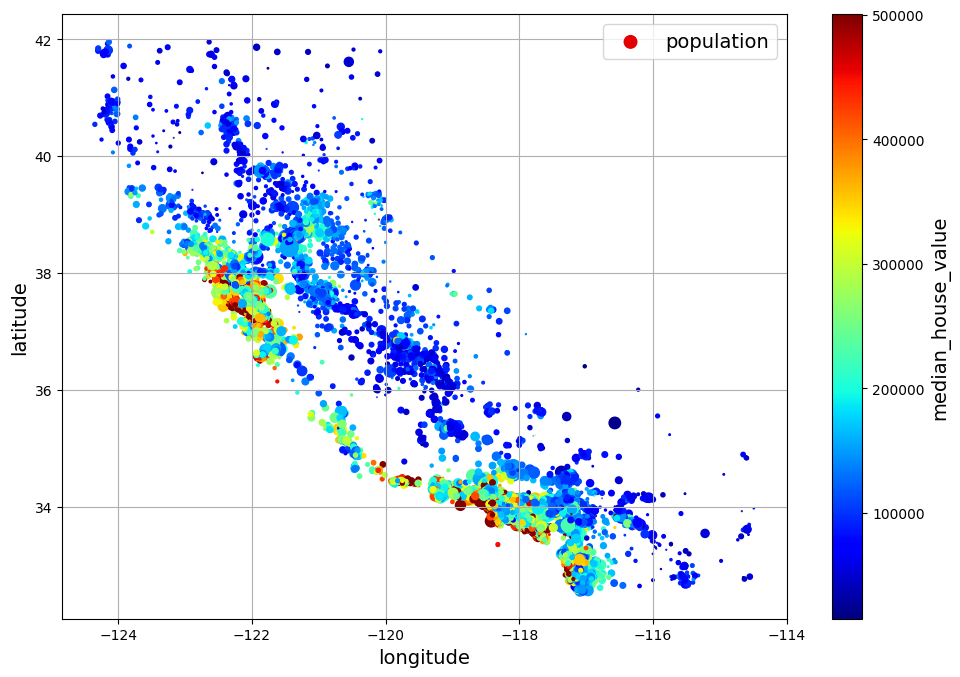

In [36]:
housing.plot(kind='scatter', x='longitude', y='latitude',
             grid=True, s=housing['population']/100,
             label='population', c='median_house_value',
             cmap='jet', colorbar=True, legend=True,
             sharex=False, figsize=(10, 7))
save_fig('housing_prices_scatterplot')
plt.show()

In [37]:
corr_matrix = housing.corr(numeric_only=True)

In [38]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

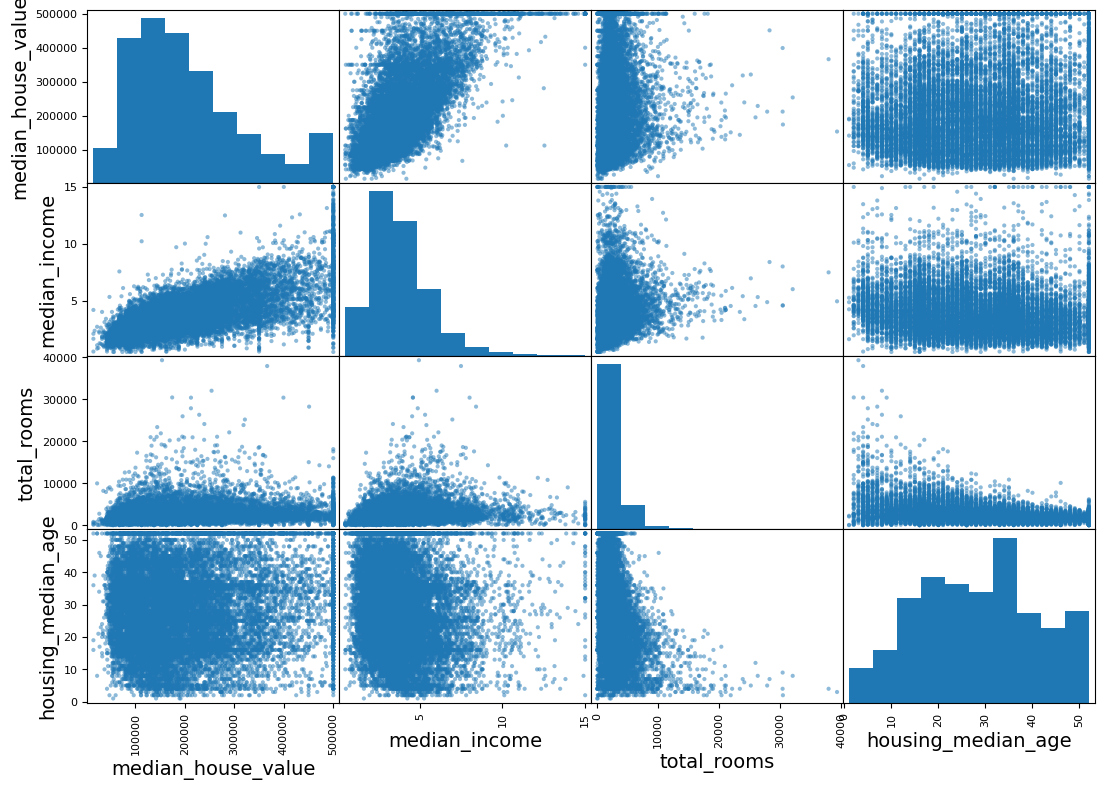

In [39]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income",
               "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(13, 9))
plt.show()

it seems likee that the most promising attribute to predict the median house value is the median income, so lets zoom.

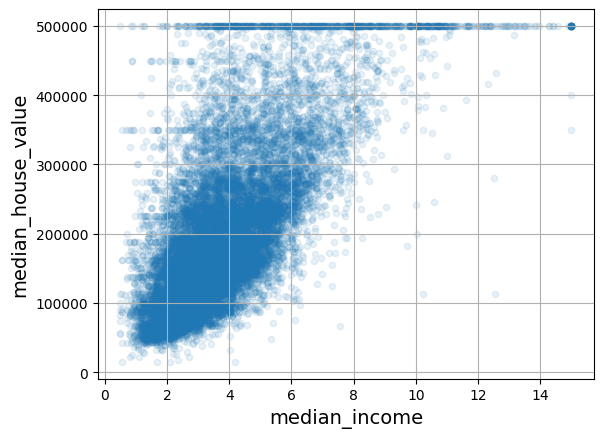

In [40]:
housing.plot(kind='scatter', x='median_income', y='median_house_value',
            alpha=0.1, grid=True)
plt.show()

the plot shows few things:
1. there is an upward trend.
2. the price cap in clearly visible as a horizonal line at 500k
3. a horizontal linee around 450k and 350k, perhaaps one at 280k and few bellow that. We may want to try removing the corresponding districts to prevent our algorithms from learning to reproduce these data quirks

## Experiment with Attributee Combinations
we gathered the following info:
1. the daata has some quirks
2. some attributes has skewed-right distribution which should be transformed (e.g., by computing their logarithm or square root)

the number of rooms in a district is not useful if we don't know how many households are there. we are interested in the number of rooms per houshould. similarly with bedrooms and other attributes

In [41]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,near_bay
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1h_ocean
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,inland
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,inland
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,near_ocean


In [42]:
housing['rooms_per_house'] = housing['total_rooms'] / housing['households']
housing['bedroom_ratio'] = housing['total_bedrooms'] / housing['total_rooms']
housing['people_per_house'] = housing['population'] / housing['households']

In [43]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedroom_ratio        -0.256397
Name: median_house_value, dtype: float64

Apparently houses with a lower bedroom/room ratio tend to be
more expensive. \
The number of rooms per household is also more
informative than the total number of rooms in a district—obviously the
larger the houses, the more expensive they are.

# Prepare the data for Machine learning algorithms

In [44]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

## cleaning the data

First, we should handle missing data. "total_bedrooms" is a clear example of a column that has missing values. We can handle this by: \
1- get rid of the corresponding districts. \
2- get rid of the whole attribute. \
3- set the missing values to some value (zero, mean, median, constant,  most frequent etc) which is called imputation.

In [45]:
#housing.dropna(subset="total_bedrooms", inplace=True) # option1
#housing.drop("total_bedrooms", axis=1) #option2
 
#median = housing["total_bedrooms"].median() #option3
#housing["total_bedrooms"].fillna(median, inplace=True) #option3

we will use the third option as it's the least destuctive.

In [46]:
# stores the median value of each feature which helps to impute future fed vales
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

# excluding non-numeric attributes
housing_num = housing.select_dtypes(include=[np.number])
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [47]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [48]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [49]:
# now replacing the missing data with out "trained" imputer
X = imputer.transform(housing_num)
# the output is a numpy array that has no column names or index
# transform to a DataFrame

housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                             index=housing_num.index)

refer to more imputer types and scikit-learn design in the notes section7

In [50]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X)

outlier_pred

array([-1,  1,  1, ...,  1,  1,  1])

In [51]:
# we can then drop
#housing = housing.iloc[outlier_pred == 1]
#housing_labels = housing_labels.iloc[outlier_pred == 1]

## Handling Text and Categorical Attributes

In [52]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
13096,near_bay
14973,<1h_ocean
3785,inland
14689,inland
20507,near_ocean
1286,inland
18078,<1h_ocean
4396,near_bay
18031,<1h_ocean
6753,<1h_ocean


most of the machine learning algos prefer to work with numbers

In [53]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

housing_cat_encoded[:8]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

In [54]:
ordinal_encoder.categories_

[array(['<1h_ocean', 'inland', 'island', 'near_bay', 'near_ocean'],
       dtype=object)]

One issue with this representation is that ML algorithms will assume that
two nearby values are more similar than two distant values. This may be
fine in some cases (e.g., for ordered categories such as “bad”, “average”,
“good”, and “excellent”), but it is obviously not the case for the
ocean_proximity column (for example, categories 0 and 4 are clearly
more similar than categories 0 and 1). To fix this issue, a common solution
is to create one binary attribute per category: one attribute equal to 1 when
the category is "<1H OCEAN" (and 0 otherwise), another attribute equal to
1 when the category is "INLAND" (and 0 otherwise), and so on. This is
called one-hot encoding, the new attriburtes are sometimees called "dummy" attributes

In [55]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
# the output will be a Scipy sparse matrix not a Numpy array
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

A sparse matrix is a very efficient representation for matrices that contain mostly zeros. Indeed, internally it only stores the nonzero values and their positions. this is idealy matches our case in 1hot encoding

In [56]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

or we can set "sparse=False" when calling fit_transform to return a Numpy array

In [57]:
cat_encoder.categories_

[array(['<1h_ocean', 'inland', 'island', 'near_bay', 'near_ocean'],
       dtype=object)]

In [58]:
#pandas also could do that
df_test = pd.DataFrame({"ocean_proximity": ["inland", "near_bay"]})
pd.get_dummies(df_test)

,ocean_proximity_inland,ocean_proximity_near_bay
0,True,False
1,False,True


It looks nice and simple, so why not use it instead of OneHotEncoder?
Well, the advantage of OneHotEncoder is that it remembers which
categories it was trained on. This is very important because once your
model is in production, it should be fed exactly the same features as during
training: no more, no less. Look what our trained cat_encoder outputs
when we make it transform the same df_test (using transform(),
not fit_transform())

In [59]:
cat_encoder.transform(df_test).toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

See the difference? get_dummies() saw only two categories, so it
output two columns, whereas OneHotEncoder output one column per
learned category, in the right order. Moreover, if you feed
get_dummies() a DataFrame containing an unknown category (e.g., "
<2H OCEAN"), it will happily generate a column for it:

In [60]:
df_test_unknown = pd.DataFrame({"ocean_proximity" : ["2H OCEAN", "island"]})
pd.get_dummies(df_test_unknown)

,ocean_proximity_2H OCEAN,ocean_proximity_island
0,True,False
1,False,True


But OneHotEncoder is smarter: it will detect the unknown category and
raise an exception. If you prefer, you can set the handle_unknown
hyperparameter to "ignore", in which case it will just represent the
unknown category with zeros

In [61]:
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(df_test_unknown).toarray() # represented with zeros

array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

When you fit any Scikit-Learn estimator using a DataFrame, the estimator
stores the column names in the feature_names_in_ attribute. ScikitLearn then ensures that any DataFrame fed to this estimator after that (e.g.,
to transform() or predict()) has the same column names.
Transformers also provide a get_feature_names_out() method that
you can use to build a DataFrame around the transformer’s output

In [62]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [63]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1h_ocean', 'ocean_proximity_inland',
       'ocean_proximity_island', 'ocean_proximity_near_bay',
       'ocean_proximity_near_ocean'], dtype=object)

In [64]:
df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown).toarray(),
                         columns=cat_encoder.get_feature_names_out(),
                         index=df_test_unknown.index)
df_output

,ocean_proximity_<1h_ocean,ocean_proximity_inland,ocean_proximity_island,ocean_proximity_near_bay,ocean_proximity_near_ocean
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0


## Feature scaling and Transformation

One of the most important transformations you need to apply to your data is feature scaling. With few exceptions, machine learning algorithms don’t perform well when the input numerical attributes have very different scales. This is the case for the housing data: the total number of rooms ranges from about 6 to 39,320, while the median incomes only range from 0 to 15. Without any scaling, most models will be biased toward ignoring the median income and focusing more on the number of rooms.

there are two ways: 1- min-max scaling also knwon as normalization and standardization

Min-max scaling (many people call this normalization) is the simplest: for each attribute, the values are shifted and rescaled so that they end up ranging from 0 to 1. This is performed by subtracting the min value and dividing by the difference between the min and the max

It has a feature_range hyperparameter that lets you change the range if, for some reason, you don’t want 0–1 (e.g., neural networks work best with zero-mean inputs, so a range of –1 to 1 is preferable).

In [65]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_min_max_scaled = min_max_scaler.fit_transform(housing_num)

Standardization is different: first it subtracts the mean value (so
standardized values have a zero mean), then it divides the result by the
standard deviation (so standardized values have a standard deviation equal to 1). Unlike min-max scaling, standardization does not restrict values to a specific range. However, standardization is much less affected by outliers.

**you can refer to an example in the book**

In [66]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

When a feature’s distribution has a heavy tail (i.e., when values far from the mean are not exponentially rare), both min-max scaling and standardization will squash most values into a small range. Machine learning models generally don’t like this at all,

scale the feature, you should first transform it to shrink the heavy tail, and if possible to make the distribution roughly symmetrical. For example, a common way to do this for positive features with a heavy tail to the right is to replace the feature with its square root (or raise the feature to a power between 0 and 1). If the feature has a really long and heavy tail, such as a power law distribution, then replacing the feature with its logarithm may help. 

For example, the population feature roughly follows a power law:
districts with 10,000 inhabitants are only 10 times less frequent than
districts with 1,000 inhabitants, not exponentially less frequent.

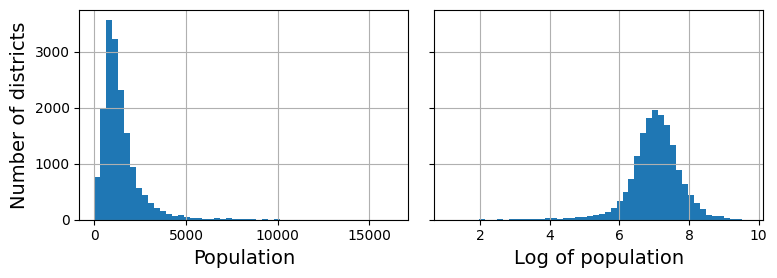

In [67]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
housing['population'].hist(ax=axs[0], bins=50)
housing["population"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of population")
axs[0].set_ylabel("Number of districts")
save_fig("long_tail_plot")
plt.show()

Another approach to handle heavy-tailed features consists in bucketizing the
feature. This means chopping its distribution into roughly equal-sized
buckets, and replacing each feature value with the index of the bucket it
belongs to, much like we did to create the income_cat feature (although
we only used it for stratified sampling).
 For example, you could replace
each value with its percentile. Bucketizing with equal-sized buckets results
in a feature with an almost uniform distribution, so there’s no need for
further scaling, or you can just divide by the number of buckets to force the
values to the 0–1 range.  bucketizing may need one hot encoding, refer to the book to get more info.

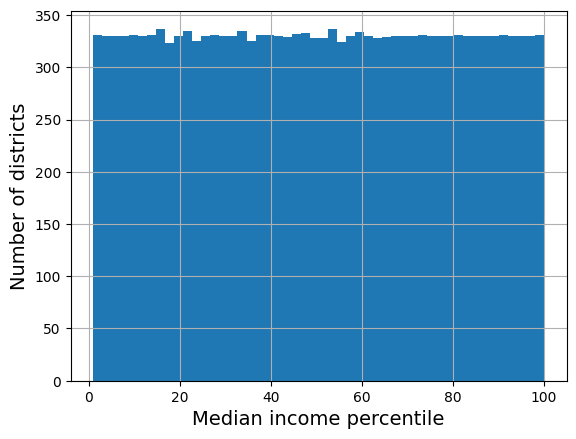

In [68]:
# extra code – just shows that we get a uniform distribution
percentiles = [np.percentile(housing["median_income"], p)
               for p in range(1, 100)]
flattened_median_income = pd.cut(housing["median_income"],
                                 bins=[-np.inf] + percentiles + [np.inf],
                                 labels=range(1, 100 + 1))
flattened_median_income.hist(bins=50)
plt.xlabel("Median income percentile")
plt.ylabel("Number of districts")
plt.show()
# Note: incomes below the 1st percentile are labeled 1, and incomes above the
# 99th percentile are labeled 100. This is why the distribution below ranges
# from 1 to 100 (not 0 to 100).

another approach to handle multimodel distributions is to add a feaature for each of the modes then computing a similarity measure usually using radial basis function "RBF"

In [69]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(housing[['housing_median_age']], [[35]],
                         gamma=0.1)

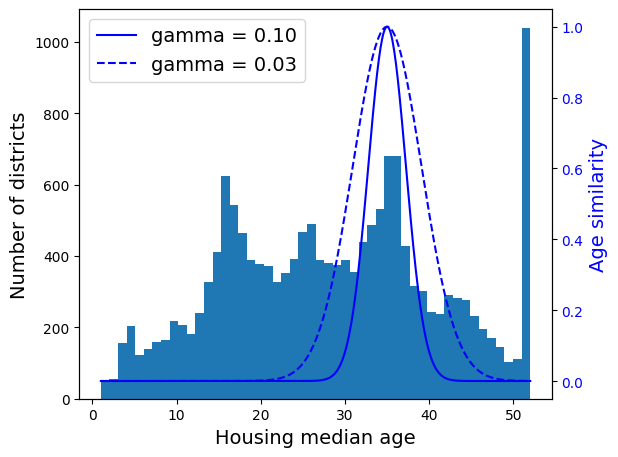

In [70]:
ages = np.linspace(housing["housing_median_age"].min(),
                   housing["housing_median_age"].max(),
                   500).reshape(-1, 1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(ages, [[35]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[35]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Housing median age")
ax1.set_ylabel("Number of districts")
ax1.hist(housing["housing_median_age"], bins=50)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
color = "blue"
ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
ax2.plot(ages, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)

plt.legend(loc="upper left")
save_fig("age_similarity_plot")
plt.show()

if this particular age group is well correlated with lower prices, there’s a good chance that this new feature will help.

after looking at the input features, the target values may also need to be transformed. **be careful**  if the target distribution has a heavy tail, you may choose to replace the target with its logarithm. But if you do, the regression model will now predict the log of the median house value, not the median house value itself. You will need to compute the exponential of the model’s prediction if you want the predicted median house value.

there are inverse_tarnsform() in scikit learn

In [71]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(
    housing_labels.to_frame())

model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)
some_new_data = housing[["median_income"]].iloc[:5]

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

In [72]:
predictions

array([[131997.15275877],
       [299359.35844434],
       [146023.37185694],
       [138840.33653057],
       [192016.61557639]])

a simpler option is to use TransformerTargetRegressor

In [73]:
from sklearn.compose import TransformedTargetRegressor
model = TransformedTargetRegressor(LinearRegression(),
                                  transformer=StandardScaler())
model.fit(housing[["median_income"]], housing_labels)
predictions = model.predict(some_new_data)

In [74]:
predictions

array([131997.15275877, 299359.35844434, 146023.37185694, 138840.33653057,
       192016.61557639])

### custom transformers
For transformations that don’t require any training, you can just write a function that takes a NumPy array as input and outputs the transformed array

In [75]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])

log_pop

,population
13096,7.362645
14973,6.501290
3785,6.331502
14689,7.520235
20507,7.555905
...,...
14207,6.843750
13105,7.257708
19301,7.942362
19121,7.452982


Your transformation function can take hyperparameters as additional arguments.

In [76]:
rbf_transformer = FunctionTransformer(rbf_kernel,
                                kw_args=dict(Y=[[35.]], gamma=0.1))
age_simil_35 = rbf_transformer.transform(housing[["housing_median_age"]])

age_simil_35

array([[2.81118530e-13],
       [8.20849986e-02],
       [6.70320046e-01],
       ...,
       [9.55316054e-22],
       [6.70320046e-01],
       [3.03539138e-04]])

Note that there’s no inverse function for the RBF kernel, since there arealways two values at a given distance from a fixed point (except at distance 0) . Also note that rbf_kernel() does not treat the features separately. If you pass it an array with two features, it will measure the 2D distance (Euclidean) to measure similarity.

In [77]:
# computing the Euclidean
san_francisco_coords = 37.7749, -122.41
san_francisco_transformer = FunctionTransformer(rbf_kernel,
                                    kw_args=dict(Y=[san_francisco_coords],
                                                gamma=0.1))
san_francisco_simil = san_francisco_transformer.transform(housing[["latitude", "longitude"]])
san_francisco_simil

array([[0.999927  ],
       [0.05258419],
       [0.94864161],
       ...,
       [0.00388525],
       [0.05038518],
       [0.99868067]])

Custom transformers are also useful to combine features.

In [78]:
#computes the ratio between the input features 0 and 1
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[: ,[1]])
ratio_transformer.transform(np.array([[1., 2.], [3., 4.]]))

array([[0.5 ],
       [0.75]])

but what if you would like your transformer to be trainable, learning some parameters in the fit() method and using them later in the transform() method? \
 For this, you need to
write a custom class. Scikit-Learn relies on duck typing, so this class does not have to inherit from any particular base class. All it needs is three methods: fit() (which must return self), transform(), and fit_transform()

In [79]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):
        self.with_mean = with_mean
        
    def fit(self, X, y=None):
        X = check_array(X) # checks that X is an array with finite float values

        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape=[1]
        
        return self # always return self!
    
    def transform(self, X):
        check_is_fitted(self) #looks for learned attributes (with trailing _)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if with_mean:
            X = X - self.mean_
        
        return X / self.scale_

refer to the notes to get scikit learn design insights

### Transformation pipeline

In [80]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])
num_pipeline

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

In [81]:
# if we don't want to name the transformers

from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                            StandardScaler())
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

If multiple transformers have the same name, an index is appended to their names (e.g., "foo-1", "foo-2", etc.).

When you call the pipeline’s fit() method, it calls fit_transform() sequentially on all the transformers, passing the output of each call as the parameter to the next call until it reaches the final estimator, for which it just calls the fit() method.


The pipeline exposes the same methods as the final estimator. In this example the last estimator is a StandardScaler, which is a transformer,so the pipeline also acts like a transformer. If you call the pipeline’s
transform() method, it will sequentially apply all the transformations to the data. If the last estimator were a predictor instead of a transformer, then the pipeline would have a predict() method rather than a transform() method. Calling it would sequentially apply all the
transformations to the data and pass the result to the predictor’s predict() method.

In [82]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

In [83]:
df_housing_num_prepared = pd.DataFrame(housing_num_prepared,
                                columns=num_pipeline.get_feature_names_out(),
                                index=housing_num.index)

df_housing_num_prepared

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365
...,...,...,...,...,...,...,...,...
14207,0.586397,-0.833359,0.987087,-0.184147,0.140152,-0.445315,0.060101,0.444041
13105,0.131525,0.319822,-0.443146,0.139847,0.128298,-0.005950,0.083608,-0.685630
19301,1.256209,-1.428701,-1.237721,0.586026,0.562134,1.268299,0.679135,0.101049
19121,0.586397,-0.739605,0.669257,0.522417,0.794461,0.273563,0.882868,0.145396


Pipelines support indexing; for example, pipeline[1] returns the second estimator in the pipeline, and pipeline[:-1] returns a Pipeline object containing all but the last estimator. You can also access the estimators via the steps attribute

So far, we have handled the categorical columns and the numerical columns separately. It would be more convenient to have a single transformer capable of handling all columns, applying the appropriate transformations to each column.

In [84]:
from sklearn.compose import ColumnTransformer

num_attribs = ["longitude", "latitude", "housing_median_age",
              "total_rooms", "total_bedrooms", "population",
              "households", "median_income"]
cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat"), cat_pipeline, cat_attribs
])

Lastly, we construct a ColumnTransformer.
Its constructor requires a list of triplets (3-tuples), each containing a name (which must be unique and not contain double underscores), a transformer, and a list of names (or indices) of columns that the transformer should be applied to.

Scikit-Learn
provides a make_column_selector() function that returns a selector
function you can use to automatically select all the features of a given type,
such as numerical or categorical. You can pass this selector function to the
ColumnTransformer instead of column names or indices.

In [85]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer((num_pipeline,
                        make_column_selector(dtype_include=np.number)),
                        (cat_pipeline, make_column_selector(
                        dtype_include=object)),
)

In [86]:
housing_prepared = preprocessing.fit_transform(housing)

In [87]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [88]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [89]:
from sklearn.cluster import KMeans
class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state
    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters,
        random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self # always return self!

    
    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [90]:
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transfomer, feature_names_in):
    return ["ratio"]

def ratio_pipeline():
    return make_pipeline(SimpleImputer(strategy="median"),
                        FunctionTransformer(column_ratio,
                                feature_names_out=ratio_name),
                        StandardScaler())

log_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                        FunctionTransformer(np.log,
                                feature_names_out="one-to-one"),
                        StandardScaler())

clust_simil = ClusterSimilarity(n_clusters=10, gamma=1.,
                               random_state=42)

default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"))

preprocessing = ColumnTransformer([
    ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
    ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
    ("people_per_house", ratio_pipeline(), ["population", "households"]),
    ("log", log_pipeline, ["total_rooms", "total_bedrooms", "population",
                          "households", "median_income"]),
    ("geo", clust_simil, ["latitude", "longitude"]),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
], remainder=default_num_pipeline)

In [91]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(16512, 24)

In [92]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_rooms',
       'log__total_bedrooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1h_ocean',
       'cat__ocean_proximity_inland', 'cat__ocean_proximity_island',
       'cat__ocean_proximity_near_bay', 'cat__ocean_proximity_near_ocean',
       'remainder__housing_median_age'], dtype=object)

# Select and Train a Model

## Train and Evaluate on the Training set

In [93]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median'))]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7e9a64d6bd00>,
                                                                                       func=<function column_rati...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e9a64fd8730>)])),
                ('linearregression', LinearRegression())])

In [94]:
housing_predictions = lin_reg.predict(housing)
housing_predictions[:5].round(-2)

array([243700., 372400., 128800.,  94400., 328300.])

In [95]:
housing_labels.iloc[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

Well, it works, but not always: the first prediction is way off (by over
$200,000!), while the other predictions are better: two are off by about
25%, and two are off by less than 10%. Remember that you chose to use the
RMSE as your performance measure, so you want to measure this
regression model’s RMSE

In [96]:
from sklearn.metrics import mean_squared_error
lin_rmse = mean_squared_error(housing_labels, housing_predictions,
                            squared=False)
lin_rmse

68687.89176590041

This is an example of a model underfitting the training data.
When this happens it can mean that the features do not provide enough
information to make good predictions, or that the model is not powerful
enough. 

This model is not regularized, which rules out the last option. You could try
to add more features, but first you want to try a more complex model to see
how it does.

In [97]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing,
                         DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median'))]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7e9a64d6bd00>,
                                                                                       func=<function column_rati...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e9a64fd8730>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [98]:
housing_predictions = tree_reg.predict(housing)
tree_rmse = mean_squared_error(housing_labels, housing_predictions,
                              squared=False)
tree_rmse

0.0

Of course, it is much more likely that the model has badly overfit the data.
How can you be sure? As you saw earlier, you don’t want to touch the test
set until you are ready to launch a model you are confident about, so you
need to use part of the training set for training and part of it for model
validation.

## Better Evaluation Using Cross-Validation

One way to evaluate the decision tree model would be to use the train_ 
test_split() function to split the training set into a smaller training set
and a validation set, then train your models against the smaller training set
and evaluate them against the validation set. It’s a bit of effort, but nothing
too difficult, and it would work fairly well.

A great alternative is to use Scikit-Learn’s k_-fold cross-validation feature.
The following code randomly splits the training set into 10 nonoverlapping
subsets called folds, then it trains and evaluates the decision tree model 10
times, picking a different fold for evaluation every time and using the other
9 folds for training.

In [99]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, housing, housing_labels,
                             scoring="neg_root_mean_squared_error",
                              cv=10)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

Scikit-Learn’s cross-validation features expect a utility function (greater is better) rather
than a cost function (lower is better), so the scoring function is actually the opposite of
the RMSE. It’s a negative value, so you need to switch the sign of the output to get the
RMSE scores.

In [100]:
pd.Series(tree_rmses).describe()

count       10.000000
mean     66646.150103
std       2669.890718
min      61928.958694
25%      65207.663395
50%      66738.158907
75%      68426.313931
max      70259.367311
dtype: float64

performs almost aas poor as the linear regression

In [101]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                RandomForestRegressor(random_state=42))

forest_rmses = -cross_val_score(forest_reg,
                    housing, housing_labels,
                    scoring="neg_root_mean_squared_error",
                    cv=10)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [102]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     46986.693701
std       1041.438627
min      45383.663126
25%      46428.757019
50%      46911.749651
75%      47261.880069
max      49284.286983
dtype: float64

if you train a RandomForest and measure the RMSE on
the training set, you will find roughly 17,474: that’s much lower, meaning
that there’s still quite a lot of overfitting going on.

In [103]:
forest_reg.fit(housing)
housing_predictions = tree_reg.predict(housing)
forest_rmse = mean_squared_error(housing_labels, housing_predictions,
                              squared=False)
forest_rmse

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ValueError: This RandomForestRegressor estimator requires y to be passed, but the target y is None.

Possible solutions are to
simplify the model, constrain it (i.e., regularize it), or get a lot more training
data.

Before you dive much deeper into random forests, however, you
should try out many other models from various categories of machine
learning algorithms (e.g., several support vector machines with different
kernels, and possibly a neural network), without spending too much time
tweaking the hyperparameters. The goal is to shortlist a few (two to five)
promising models.


## Fine-Tuning the Model

## Grid Search

In [107]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42))
])

param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],
     'random_forest__max_features': [4, 6, 8]},
    {'preprocessing__geo__n_clusters':[10, 15],
     'random_forest__max_features': [6, 8, 110]},
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                          scoring="neg_root_mean_squared_error")
grid_search.fit(housing, housing_labels)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median'))]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<function ratio_name at 0x7e9a64d6bd00>,
                                                                                                              f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7e9a64fd8730>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 110]}],
             scoring='neg_root_mean_squared_error')

"preprocessing__geo__n_clusters", it splits this string at the
double underscores, then it looks for an estimator named
"preprocessing" in the pipeline and finds the preprocessing
ColumnTransformer. Next, it looks for a transformer named "geo"
inside this ColumnTransformer and finds the ClusterSimilarity
transformer we used on the latitude and longitude attributes. Then it finds
this transformer’s n_clusters hyperparameter.

In [108]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

Since 15 is the maximum value that was evaluated for n_clusters, you should
probably try searching again with higher values; the score may continue to improve.

In [112]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
12,6.475136,0.048952,0.157782,0.003520,15,6,"{'preprocessing__geo__n_clusters': 15, 'random...",-43406.788716,-43847.460917,-44714.613458,-43989.621030,543.297655,1
13,7.953175,0.039492,0.154620,0.001014,15,8,"{'preprocessing__geo__n_clusters': 15, 'random...",-44071.842058,-44241.609368,-45005.695035,-44439.715487,406.164886,2
6,4.834259,0.106575,0.155574,0.000574,10,4,"{'preprocessing__geo__n_clusters': 10, 'random...",-44538.868772,-44877.009830,-45872.955553,-45096.278051,566.277788,3
9,6.459337,0.073724,0.160167,0.008150,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-44596.191925,-44849.092477,-45887.355439,-45110.879947,558.674213,4
7,6.321333,0.074290,0.155374,0.002421,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-44596.191925,-44849.092477,-45887.355439,-45110.879947,558.674213,4


## Randomized Search

For each hyperparameter, you must provide either a list of possible values,
or a probability distribution:

In [119]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {"preprocessing__geo__n_clusters": randint(low=3, high=50),
                 "random_forest__max_features": randint(low=2, high=20)}
rnd_search = RandomizedSearchCV(full_pipeline, param_distributions=param_distribs,
                               n_iter=10, cv=3, scoring="neg_root_mean_squared_error",
                            random_state=42)
rnd_search.fit(housing, housing_labels)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median'))]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_out=<function ratio_name at 0x7e9a64d6b...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e9a64e64820>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e9a64e66290>},
                   random_state=42, scoring='neg_root_mean_squared_error')

Scikit-Learn also has HalvingRandomSearchCV and
HalvingGridSearchCV hyperparameter search classes. 

## Ensemble Methods

Another way to fine-tune your system is to try to combine the models that
perform best. The group (or “ensemble”) will often perform better than the
best individual model—just like random forests perform better than the
individual decision trees they rely on—especially if the individual models
make very different types of errors.

## Analyzing the Best Models and Their Errors

In [121]:
final_model = rnd_search.best_estimator_ # includes preprocessing

feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.07, 0.05, 0.05, 0.01, 0.01, 0.01, 0.01, 0.19, 0.04, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.01, 0.01, 0.01, 0.  , 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.01, 0.01, 0.01, 0.01, 0.02,
       0.01, 0.  , 0.02, 0.03, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.01,
       0.01, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.01, 0.  , 0.08,
       0.  , 0.  , 0.  , 0.01])

In [122]:
sorted(zip(feature_importances,
           final_model["preprocessing"].get_feature_names_out()),
       reverse=True)

[(0.19239696210958188, 'log__median_income'),
 (0.07728105377608402, 'cat__ocean_proximity_inland'),
 (0.06826793825987713, 'bedrooms__ratio'),
 (0.052069001803659934, 'rooms_per_house__ratio'),
 (0.05101630481251542, 'people_per_house__ratio'),
 (0.03546779427529109, 'geo__Cluster 0 similarity'),
 (0.027033751961711667, 'geo__Cluster 28 similarity'),
 (0.023162963860521624, 'geo__Cluster 24 similarity'),
 (0.021349462025319607, 'geo__Cluster 43 similarity'),
 (0.021234953752417084, 'geo__Cluster 34 similarity'),
 (0.020507404731310932, 'geo__Cluster 27 similarity'),
 (0.018004717520196525, 'geo__Cluster 37 similarity'),
 (0.01402483133208726, 'geo__Cluster 39 similarity'),
 (0.013968201237596699, 'geo__Cluster 20 similarity'),
 (0.013874202806793181, 'geo__Cluster 9 similarity'),
 (0.013779182407903143, 'geo__Cluster 31 similarity'),
 (0.013628776383115547, 'geo__Cluster 38 similarity'),
 (0.012721743444606155, 'geo__Cluster 4 similarity'),
 (0.012495700703576956, 'geo__Cluster 3 simi

With this information, you may want to try dropping some of the less useful
features (e.g., apparently only one ocean_proximity category is really
useful, so you could try dropping the others)

## Evaluate Your System on the Test Set

In [123]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

41569.12020435285


In some cases, such a point estimate of the generalization error will not be
quite enough to convince you to launch: what if it is just 0.1% better than
the model currently in production? You might want to have an idea of how
precise this estimate is. For this, you can compute a 95% confidence
interval for the generalization error

In [125]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))


array([39395.62232135, 43634.48694601])

## Launch, Monitor, and Maintain Your System

In [ ]:
import joblib
joblib.dump(final_model, "my_california_housing_model.pkl")